In [1]:
import gymnasium as gym
import numpy as np
from collections import defaultdict

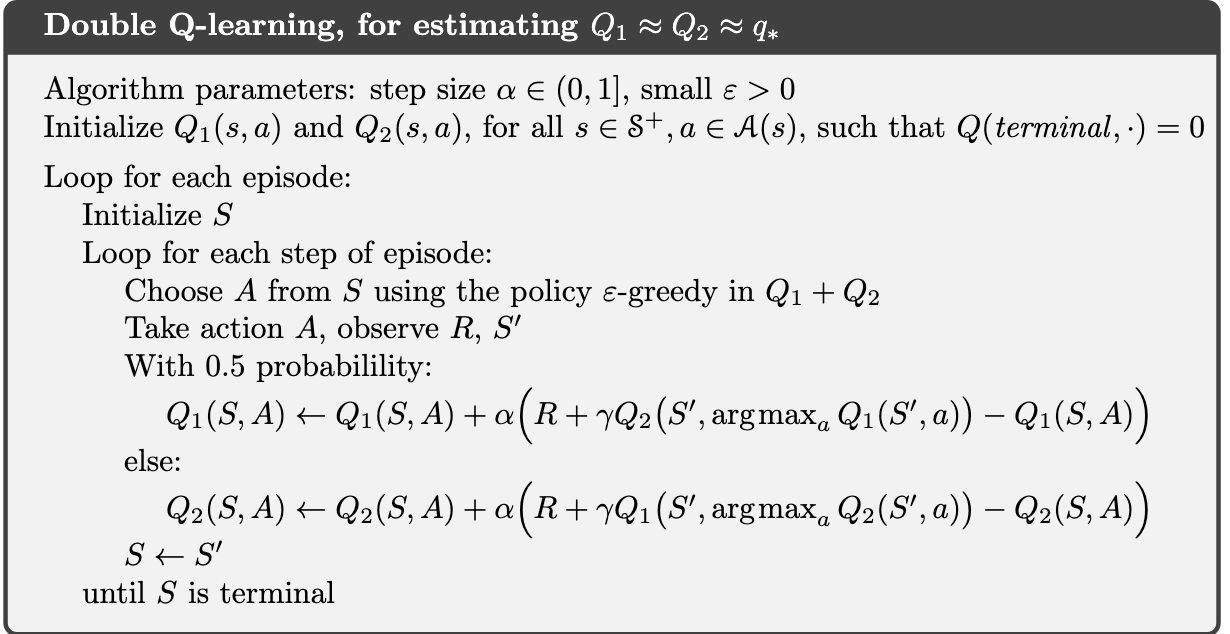

In [1]:
def double_Q_learning(env, epsilon=0.1, step_size=0.5, discount_factor=1.0, episodes=10000, max_t=None):
    nS = env.observation_space.n
    nA = env.action_space.n
    Q1 = defaultdict(lambda: np.zeros(nA))
    Q2 = defaultdict(lambda: np.zeros(nA))

    for i in range(episodes):
        state, _ = env.reset()
        steps = 0 
        while(True):
            Q_sum = Q1[state]+Q2[state]
            greedy = np.flatnonzero(Q_sum == Q_sum.max())
            probs = np.full(nA, epsilon/nA)
            probs[greedy] += (1.0-epsilon) / len(greedy)
            action = np.random.choice(nA, p=probs)
            s_next, reward, term, trun, _ = env.step(action)
            steps += 1
            if np.random.rand() <0.5:
                best_action = np.argmax(Q1[s_next])
                Q1[state][action] += step_size*(reward + discount_factor*Q2[s_next][best_action]-Q1[state][action])
            else:
                best_action = np.argmax(Q2[s_next])
                Q2[state][action] += step_size*(reward + discount_factor*Q1[s_next][best_action]-Q2[state][action])

            state = s_next

            if term or trun:
                break
            if max_t is not None and steps >= max_t:
                break
    
    Q = defaultdict(lambda: np.zeros(nA))
    for s in set(Q1) | set(Q2):
        Q[s] = Q1[s] + Q2[s]
    return Q
